In [306]:
import pandas as pd
from sklearn import preprocessing
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from scipy.cluster.hierarchy import dendrogram, linkage

In [307]:
# Upload dos dados e metadados
datai = pd.read_csv("gds1686.csv", sep=',', index_col = 0)
meta = pd.read_csv("meta-gds1686.csv", sep = ",", index_col = 0)

In [308]:
# Contagem do número de atributos e instâncias dos dados e metadados
print('Dados: ', datai.values.shape)
print('Metadados: ', meta.values.shape)

Dados:  (14010, 30)
Metadados:  (30, 4)


**Dados e metadados**

Os dados são compostos por 14010 instâncias (linhas) e 30 atributos (colunas).
Os metadados são compostos por 30 instâncias e 4 atributos.

Criou-se então a matriz de dados transposta, de forma a ter o mesmo número de atributos nos dados e metadados. As 30 instâncias correspondem às 30 moscas, submetidas às medições dos níveis de expressão dos genes nos diferentes ambientes. Os 14010 atributos são os genes estudados.

In [309]:
data=datai.transpose()
print(data)


          141200_at  141201_at  141202_at  141203_at  141204_at  141205_at  \
GSM95424    3.77628    5.64283    6.80354    5.42622    4.58124    5.94997   
GSM95425    3.44458    5.47795    7.01271    5.53965    4.55277    5.94535   
GSM95444    3.76067    5.53370    6.81637    5.38007    4.45829    5.97233   
GSM95324    3.38473    5.58603    6.66803    5.26991    4.45801    5.62635   
GSM95421    3.57696    5.60629    6.73312    5.18558    4.56932    5.79158   
GSM95423    3.71310    5.57885    6.96012    5.36280    4.45476    5.75519   
GSM95325    3.59374    5.60380    6.55975    5.06871    4.47072    5.63485   
GSM95420    3.68243    5.40856    6.91156    5.31143    4.60259    5.84344   
GSM95422    3.71822    5.53217    6.53144    5.24742    4.68283    5.89039   
GSM95290    3.95261    5.55998    7.19880    5.51060    4.74907    6.27263   
GSM95292    3.67817    5.37299    7.10604    5.55732    4.73757    6.38052   
GSM95293    3.57283    5.60045    6.99170    4.92440    4.60691 

In [310]:
# Missing Values 
print("Valores em falta nos dados:")
print(data.isnull().sum().sum())
print("Valores em falta nos metadados:")
print(meta.isnull().sum().sum())

Valores em falta nos dados:
0
Valores em falta nos metadados:
0


In [311]:
# Descrição dos atributos nos dados
print("Tipos de atributos nos dados:")
print(data.dtypes)

Tipos de atributos nos dados:
141200_at               float64
141201_at               float64
141202_at               float64
141203_at               float64
141204_at               float64
                         ...   
AFFX-TrpnX-M_at         float64
AFFX-YEL002c/WBP1_at    float64
AFFX-YEL018w/_at        float64
AFFX-YEL021w/URA3_at    float64
AFFX-YEL024w/RIP1_at    float64
Length: 14010, dtype: object


In [312]:
# Missing Values in metadataint("Total de valores em falta nos metadados:")
print(meta.isnull().sum().sum())

0


In [313]:
# Descrição dos atributos nos metadados
print("Tipos de atributos nos metadados:")
print(meta.dtypes)

Tipos de atributos nos metadados:
sample         object
protocol       object
time           object
description    object
dtype: object


**Data Understanding**

Este estudo pretendia investigar os efeitos da privação do sono no cérebro de moscas fêmeas virgens da espécie Drosophila melanogaster, através da análise de variações na expressão génica destas. Os genes estudados tinham já sido documentados como sendo regulados de forma diferente durante períodos de sono ou atividade. 

Obtiveram-se informações sobre os processos moleculares dinâmicos que são alterados durante a vigília e durante o sono. Para tal, realizou-se um estudo de perfil de expressão de RNA examinando-se mudanças temporais no cérebro da Drosophila em relação à duração do sono ou vigília anteriores. O projeto experimental permitiu determinar se os genes identificados como regulados diferencialmente entre o sono e a vigília eram regulados para cima ou para baixo nesses estados.

Parte dos dados dizem respeito ao controlo dos processos circadianos, matando-se animais em quatro pontos de tempo (0, 2, 4 e 6 horas) desde o início do período de descanso consolidado [Zeitgeber Time (ZT) 14)] sob duas condições: privação de sono e sono espontâneo. O ponto de tempo “0” trata-se do controlo do período de sono.

O restantes dados surgiram com o intuito de controlar o efeito do estimulação das moscas durante a privação de sono, sendo referentes à estimulação manual das moscas durante o seu período ativo de ZT10-ZT14. Neste conjunto de dados, foram analisadas moscas no ponto de tempo “0”/ZT10 (controlo) e ao fim de 4 horas/ZT14, para moscas perturbadas e não perturbadas.

Nos dados, cada atributo representa um dos genes em estudo e cada instância corresponde a uma das amostras. Assim, cada linha terá 14010 valores de expressão de cada gene (cada célula é representada por um dado do tipo *float64*).
 
Já nos metadados, os atributos são: a amostra, o ambiente a que foi sujeita, o período de sujeição ao ambiente e a descrição de cada instância. Estes atributos são do tipo *object*. Os meta-dados possuem quatro variáveis ("sample", "protocol", "time", "description"), mas apenas duas possuem informação relevante para análise dos dados e geração dos modelos de machine learning: "protocol" e "time".

**Data Processing**

Neste dataset, as amostras estão agrupadas em ambientes de recolha. Tendo isto em conta e o facto de serem apenas 30, não se considerou pertinente proceder à remoção de outliers. Também não se verifica a existência de valores nulos.
Como todos os dados estão representados na mesma escala (nível de expressão génica) e o número de atributos é igual para todas as amostras, não haveria necessidade total de realizar normalização nem balaceamento dos dados. Contudo, procedeu-se na mesma à normalização para obter média igual a zero e desvio-padrão igual a 1, para na análise dos modelos a criar se poder deixar de lado a importância da escala.

Este dataset apresenta um elevado valor de atributos (colunas) - 14010 - correspondentes aos diferentes genes estudados. Uma análise de PC (Principal Components) permitirá reduzir este número, considerando apenas os atributos que conseguem explicar a maioria da variabilidade dos dados. Por exemplo, se se aplicar uma PCA que permita explicar 90% desta variabilidade, reduzir-se-á o número de atributos (genes a analisar) àqueles que a explicam.

[2.39691084e-01 1.58470120e-01 7.16860362e-02 4.50942771e-02
 3.79773784e-02 3.63413360e-02 3.27745431e-02 2.90720793e-02
 2.77946897e-02 2.40645040e-02 2.23265235e-02 2.06159151e-02
 1.96604660e-02 1.90771731e-02 1.86079279e-02 1.76392933e-02
 1.72669578e-02 1.62588555e-02 1.57998798e-02 1.52603008e-02
 1.47597314e-02 1.43374509e-02 1.40301536e-02 1.31051139e-02
 1.25497475e-02 1.23073635e-02 1.19131001e-02 1.12827570e-02
 1.02352418e-02 3.84708172e-34]
0.702966047660038


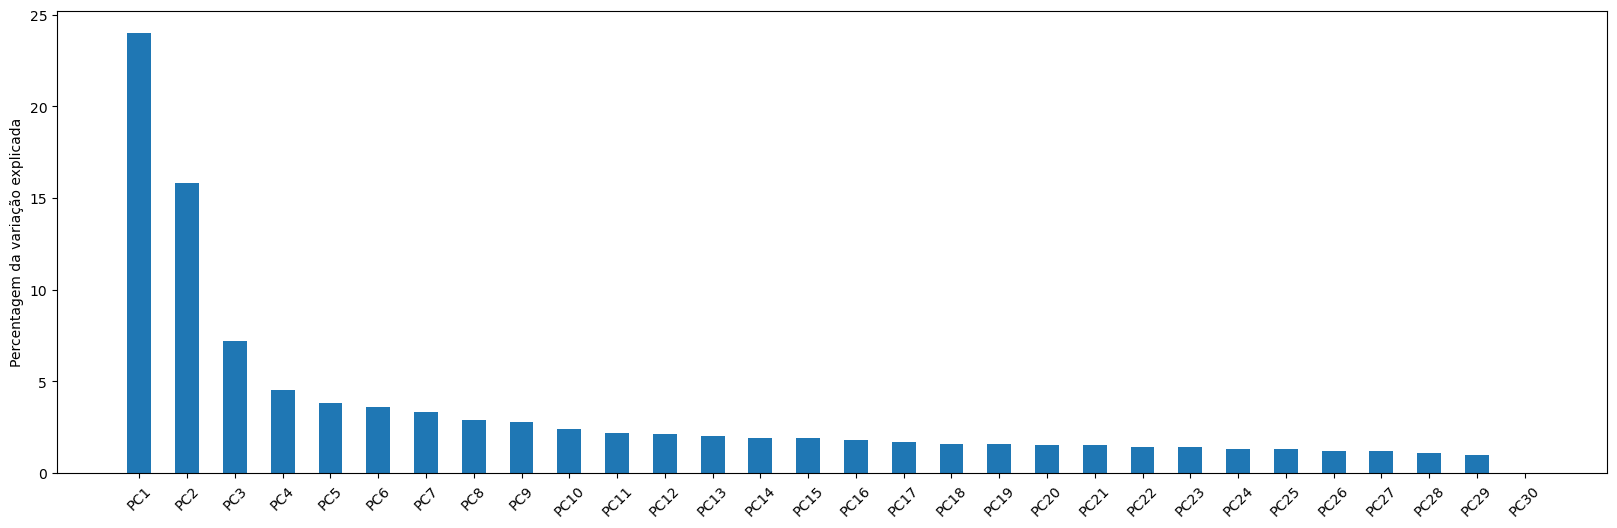

0.702966047660038 9
0.7252925711182634 10
0.7459084862141241 11
0.7655689522059183 12
0.7846461252670309 13
0.8032540531492964 14
0.8208933464185276 15
0.8381603042439876 16
0.8544191596971645 17
0.8702190394635029 18
0.8854793402199539 19
0.9002390716175565 20
0.914576522553859 21
0.9286066761961072 22
0.9417117901049407 23
0.9542615375943395 24
0.9665689011365898 25
0.9784820012019473 26
0.9897647582223359 27
0.9999999999999999 28
0.9999999999999999 29


In [314]:
n=30 # 30 amostras para análise
pca = PCA(n_components=n)
data_scale = preprocessing.scale(data)
pca.fit(data_scale)                                                           # media e desvio
x_reduced = pca.transform(data_scale)   
principalComponents = pca.fit_transform(x_reduced)# escala
print (pca.explained_variance_ratio_) 
print(sum(pca.explained_variance_ratio_[:10]))                          # 90% da variabilidade

per_var=np.round(pca.explained_variance_ratio_*100, decimals=1)
labels=["PC"+str(x) for x in range(1,len(per_var)+1)]                  
plt.figure(figsize=(20, 6))  # width:20, height:3

plt.bar([x*2 for x in range(1,len(per_var)+1)], height=per_var, align="center", width=1)
plt.ylabel("Percentagem da variação explicada")
plt.xticks([x*2 for x in range(1,len(per_var)+1)], labels, rotation=45)


plt.show()

soma=0
for i in range(len(pca.explained_variance_ratio_)):
    soma+=pca.explained_variance_ratio_[i]
    if soma>=0.70:
        print(soma,i)



O gráfico das percentagens de variabilidade explicadas por PC permite inferir que a partir dos 10 primeiros componentes a variabilidade adicional explicada por cada novo componente principal é muito baixa. Os 10 primeiros PC descrevem 72.5% da variabilicade, enquanto que os "standard" 90% de variabilidade são atingidos com 20 PC's.

COMO SABER QUAIS OS ATRIBUTOS QUE CONSTITUEM CADA PC??????
E COMO SELECIONAR APENAS ESSES PARA A CRIAÇÃO DOS MODELOS?????

In [315]:
#descricao=data.describe()

In [316]:
#print(descricao)


**SECÇÃO 2**

Análise estatística dos dados

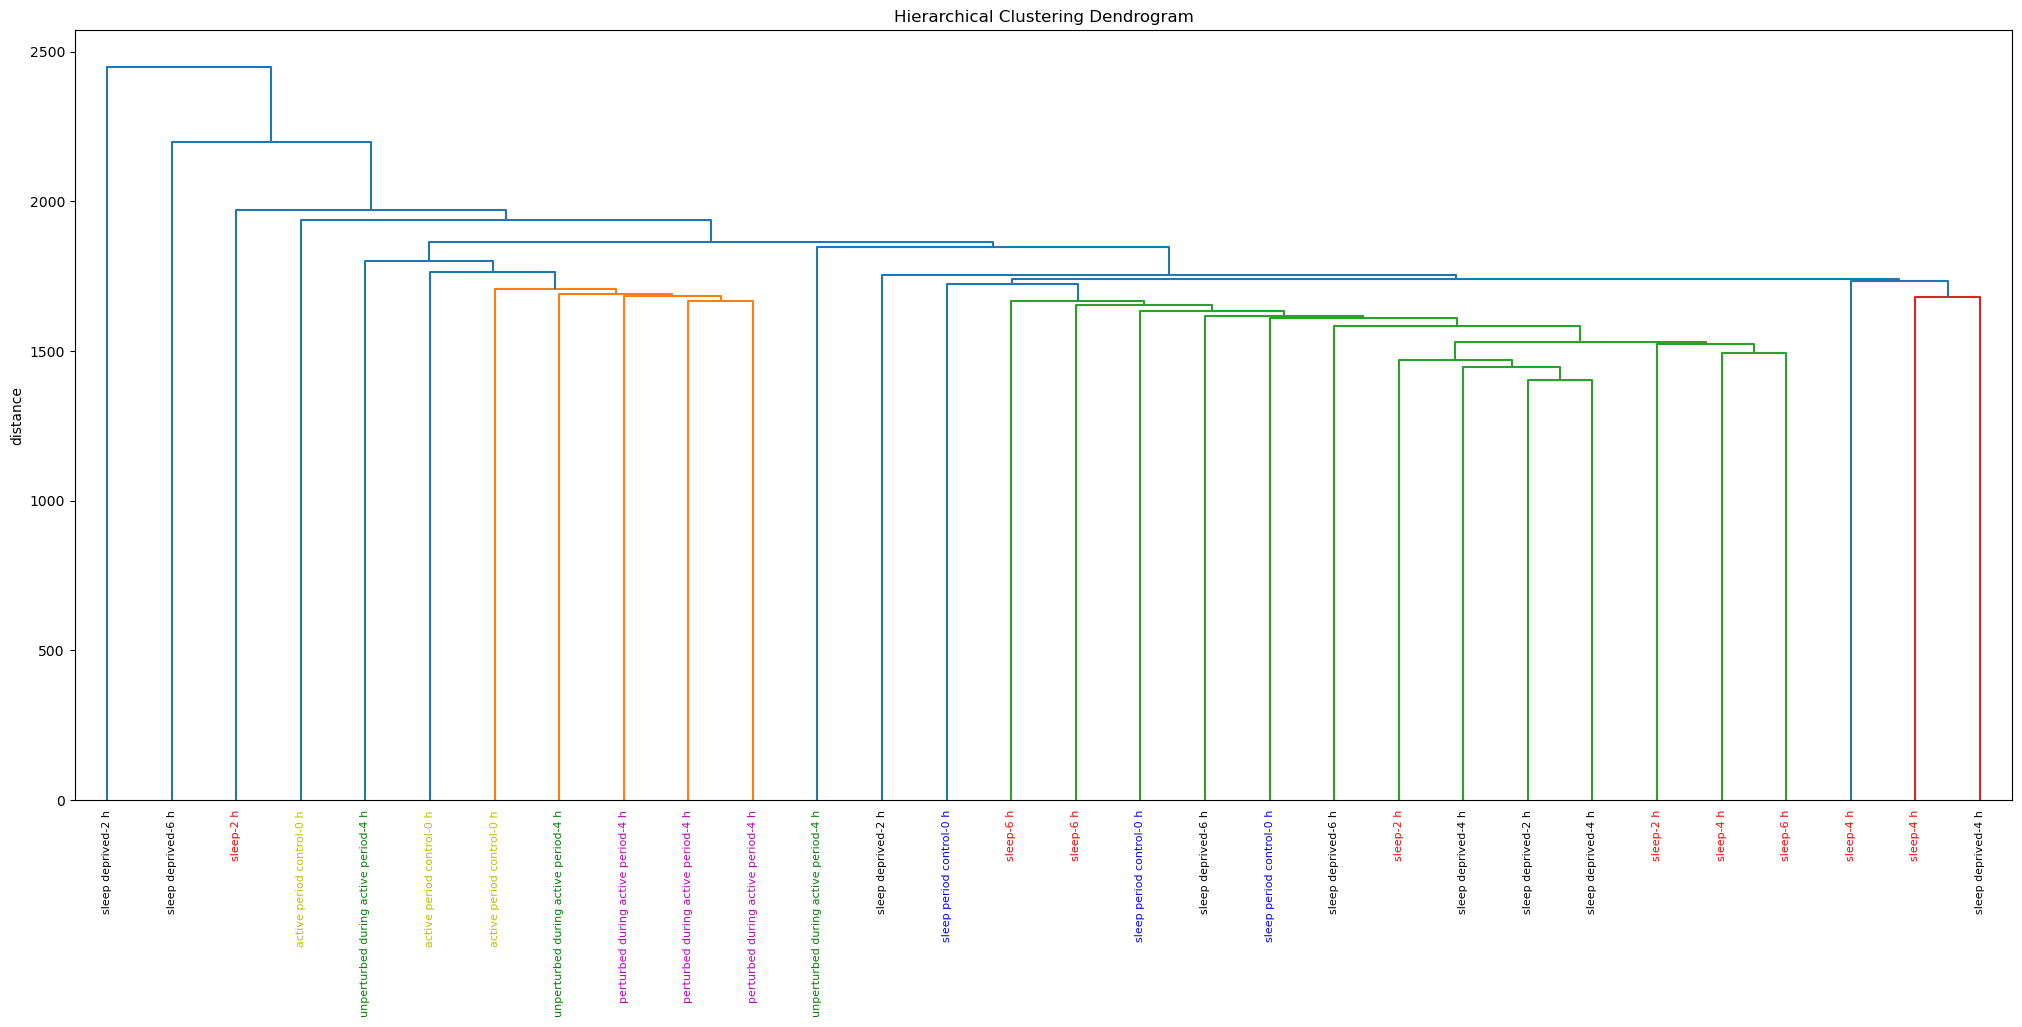

In [317]:
Z = linkage(data, metric='cityblock')
meta_data = meta
meta_data['labels'] = meta_data['protocol'] + '-' + meta_data['time'].astype(str)

# calculate full dendrogram
plt.figure(figsize=(25, 10))
dendrogram(
    Z,
    labels=list(meta_data['labels']),
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)

plt.title('Hierarchical Clustering Dendrogram')
plt.ylabel('distance')


# Assignment of colors to labels: 'a' is red, 'b' is green, etc.
label_colors = {'active period control-0 h': 'y', 
                'unperturbed during active period-4 h': 'g', 
                'perturbed during active period-4 h': 'm',
                'sleep period control-0 h': 'b', 
                'sleep-2 h': 'r',
                'sleep-4 h': 'r',
                'sleep-6 h': 'r',
                'sleep deprived-2 h': 'k',
                'sleep deprived-4 h': 'k',
                'sleep deprived-6 h': 'k',
               }
ax = plt.gca()
xlbls = ax.get_xmajorticklabels()
for lbl in xlbls:
    lbl.set_color(label_colors[lbl.get_text()])

plt.show()

O cluster hierárquico permite retirar desde já algumas conclusões:

    - as moscas que dormiram apresentam padrões de expressão mais próximos entre si, qualquer que seja o período, estando localizados na sua maioria no cluster verde.
    
    - as moscas perturbadas durante o período ativo apresentam igualmente padrões muito próximos entre si (cluster laranja), o que pode revelar que há mecanismos comuns que são ativados em qualquer mosca que seja perturbada (talvez algum complexo de "fight or flight".
    
    - as moscas privadas do sono apresentam expressões mais variadas, o que pode significar que o tipo de resposta nestas situações varia de organismo para organismo e ao longo do tempo a que estão sujeitos a esta imposição. Como a privação do sono costuma provocar uma desregulação das funções normais, essa desregulação pode ocorrer de forma diferente para cada um.

In [318]:
from sklearn.cluster import KMeans

k=4
kmeans = KMeans(n_clusters=k, max_iter=1000)
kmeans.fit(data_scale)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

pd.crosstab(labels, meta['protocol'], rownames=['clusters'] )

protocol,active period control,perturbed during active period,sleep,sleep deprived,sleep period control,unperturbed during active period
clusters,,,,,,
0,0,0,0,4,0,0
1,2,3,1,0,1,2
2,1,0,6,3,2,0
3,0,0,2,2,0,1


Esta análise de cluster realizada por kmeans comprovas as conclusões anteriores, onde se verifica que as moscas que dormiram se concentram maioritariamente no cluster 1, as perturbadas no período ativo se encontram todas no cluster 2 e as que foram privadas de sono apresentam uma distribuição errática.

**SECÇÃO 3**

A fase seguinte é a de implementação de modelos de Machine Learning. Para isso, é necessário dividir os dados em conjuntos de treino e de teste. O primeiro serve de input ao modelo para que este possa criar as suas relações e o segundo, como o nome indica, permite que essas relações sejam testadas e ver até que ponto foram eficazes a prever o ambiente a que as moscas haviam sido sujeitas.

In [319]:
from sklearn.model_selection import train_test_split

input_data = data.values
#output_data = meta_data['labels'].values
output_data = meta['protocol'].values
input_sc = preprocessing.scale(input_data)
print(len(input_sc))

treinoX, testeX, treinoY, testeY = train_test_split(input_sc, output_data, train_size=2/3, random_state=0)
print("TreinoX ", treinoX.shape)
print("TesteX", testeX.shape)
print("TreinoY ", treinoY.shape)
print("TesteY", testeY.shape)

30
TreinoX  (20, 14010)
TesteX (10, 14010)
TreinoY  (20,)
TesteY (10,)


K-neighbours

In [320]:
knn = KNeighborsClassifier()
knn.fit(treinoX, treinoY)
preds_knn = knn.predict(testeX)

from sklearn.metrics import accuracy_score
print('Accuracy: ', accuracy_score(preds_knn, testeY))

Accuracy:  0.3


C:\Users\tomas\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Modelo de Decision Tree

In [321]:
from sklearn import tree
from sklearn import tree

tree_model = tree.DecisionTreeClassifier()
tree_model = tree_model.fit(treinoX, treinoY)
print('Accuracy: ', tree_model.score(testeX,  testeY))

Accuracy:  0.4


Regressao Logistica

In [322]:
from sklearn import linear_model

logistic = linear_model.LogisticRegression(C=1e5, solver = "liblinear", multi_class = "auto")
logistic = logistic.fit(treinoX, treinoY)
print('Accuracy: ', logistic.score(testeX,  testeY))

Accuracy:  0.5


SVM

In [323]:
from sklearn import svm

svm_model = svm.SVC(kernel='linear', C=1)
svm_model = svm_model.fit(treinoX, treinoY)
print('Accuracy: ', svm_model.score(testeX,  testeY))

Accuracy:  0.5


Naive Bayes

In [324]:
from sklearn.naive_bayes import GaussianNB

gnb_model = GaussianNB()
gnb_model = gnb_model.fit(treinoX, treinoY)
print('Accuracy: ', gnb_model.score(testeX,  testeY))

Accuracy:  0.2


Os modelos não conseguiram prever de forma eficaz o tipo de ambiente ('protocol') a que as moscas foram sujeitas, como se pode verificar pelos valores de 'accuracy' obtidos para cada um dos 5 modelos aplicados. O ideal seria conseguir prever com exatidão o conjunto das duas colunas significativas dos meta-dados: 'protocol' e 'time'. Ou seja, deviam conseguir prever o ambiente a que as moscas haviam sido sujeitas bem como a duração dessa exposição. Contudo, se os valores de 'accuracy' foram já tão baixos a prever apenas o 'protocol', seriam ainda piores a prever a combinação destas duas variáveis.

Isto pode dever-se ao número muito baixo de amostras disponíveis (apenas 30). Isto faz com que o subconjunto de treino seja muito pequeno (apenas 20, já que se dividiu o dataset em 2/3 para teste e 1/3 para treino), deixando os modelos com pouca informação para estabelecer as suas relações de forma assertiva.

Ainda assim, fez-se uma análise de 'cross validation' para tentar perceber qual dos modelos foi mais bem-sucedido:

K-neighbours

In [325]:
from sklearn.model_selection import cross_val_score

scores_knn = cross_val_score(estimator = knn, X= input_sc, y= output_data, cv= 3)
print("knn", scores_knn)
print('Média: ', scores_knn.mean())

knn [0.5 0.3 0.4]
Média:  0.4000000000000001


C:\Users\tomas\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\tomas\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

Decision Tree

In [326]:
scores_tree_model = cross_val_score(estimator = tree_model, X= input_sc, y= output_data, cv= 3)
print("tree_model", scores_tree_model)
print('Média: ', scores_tree_model.mean())

tree_model [0.5 0.5 0.3]
Média:  0.43333333333333335


Regressão Logística

In [327]:
scores_logistic = cross_val_score(estimator = logistic, X= input_sc, y= output_data, cv= 3)
print("logistic", scores_logistic)
print('Média: ', scores_logistic.mean())

logistic [0.5 0.5 0.3]
Média:  0.43333333333333335


SVM

In [328]:
scores_svm = cross_val_score(estimator = svm_model, X= input_sc, y= output_data, cv= 3)
print("svm_model", scores_svm)
print('Média: ', scores_svm.mean())

svm_model [0.6 0.5 0.7]
Média:  0.6


Naive Bayes

In [329]:
scores_gnb_model = cross_val_score(estimator = gnb_model, X= input_sc, y= output_data, cv= 3)
print("gnb_model", scores_gnb_model)
print('Média: ', scores_gnb_model.mean())

gnb_model [0.5 0.2 0.6]
Média:  0.4333333333333333


In [330]:
tab = {'Modelo': ['K-Neighbours', 'Decision Tree', 'Regressao Logistica', 'SVM', 'Naive Bayes'],
        'Accuracy': [accuracy_score(preds_knn, testeY), tree_model.score(testeX,  testeY), logistic.score(testeX,  testeY), svm_model.score(testeX,  testeY), gnb_model.score(testeX,  testeY)],
        'Média CV': [scores_knn.mean(), scores_tree_model.mean(), scores_logistic.mean(), scores_svm.mean(), scores_gnb_model.mean()]}
tabela = pd.DataFrame(tab)

# Print the dataframe as a table
print(tabela.to_string())

                Modelo  Accuracy  Média CV
0         K-Neighbours       0.3  0.400000
1        Decision Tree       0.4  0.433333
2  Regressao Logistica       0.5  0.433333
3                  SVM       0.5  0.600000
4          Naive Bayes       0.2  0.433333


Através desta análise, percebe-se que apesar das limitações, o modelo que se portou melhor foi o SVM.

Como aquilo que se pretende ultimamente com o modelo é conseguir prever se a mosca esteve num período de sono ou de privação deste, e de forma a melhor a 'accuracy' dos modelos, decidiu-se remover as 'samples' das moscas usadas para estudar o período ativo, mantendo apenas as de controlo de sono, sono e privação do sono. Desta forma os dados utilizados para treino terão maior percentagem de informação relevante par as relações que se quer estabelecer.

In [331]:
# Junção das duas bases de dados através do número da amostra
merged = pd.merge(data, meta, left_index=True, right_on='sample')

# Selecionar as instâncias que têm a palavra 'active' no atributo 'protocol'
active_rows = merged[merged['protocol'].str.contains('active')]
#print(active_rows)

# Eliminar as instâncias selecionadas atrás dos dados e metadados
data = data[~data.index.isin(active_rows.index)]
meta = meta[~meta.index.isin(active_rows['sample'])]


In [332]:
#Definição dos conjuntos de treino e teste com os novos dados e metadados

input_data = data.values
#output_data = meta_data['labels'].values
output_data = meta['protocol'].values
input_sc = preprocessing.scale(input_data)
print(len(input_sc))

treinoX, testeX, treinoY, testeY = train_test_split(input_sc, output_data, train_size=2/3, random_state=0)
print("TreinoX ", treinoX.shape)
print("TesteX", testeX.shape)
print("TreinoY ", treinoY.shape)
print("TesteY", testeY.shape)

21
TreinoX  (14, 14010)
TesteX (7, 14010)
TreinoY  (14,)
TesteY (7,)


K-Neighbours

In [333]:
knn = KNeighborsClassifier()
knn.fit(treinoX, treinoY)
preds_knn = knn.predict(testeX)
from sklearn.metrics import accuracy_score
print('Accuracy: ', accuracy_score(preds_knn, testeY))
      
scores_knn = cross_val_score(estimator = knn, X= input_sc, y= output_data, cv= 3)
print("knn", scores_knn)
print('Média: ', scores_knn.mean())

Accuracy:  0.7142857142857143
knn [0.57142857 0.28571429 0.57142857]
Média:  0.4761904761904761


C:\Users\tomas\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\tomas\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

Modelo de Decision Tree

In [334]:
from sklearn import tree

tree_model = tree.DecisionTreeClassifier()
tree_model = tree_model.fit(treinoX, treinoY)
print('Accuracy: ', tree_model.score(testeX,  testeY))

scores_tree_model = cross_val_score(estimator = tree_model, X= input_sc, y= output_data, cv= 3)
print("tree_model", scores_tree_model)
print('Média: ', scores_tree_model.mean())

Accuracy:  0.8571428571428571
tree_model [1.         0.28571429 0.28571429]
Média:  0.5238095238095237


Regressao Logistica

In [335]:
from sklearn import linear_model

logistic = linear_model.LogisticRegression(C=1e5, solver = "liblinear", multi_class = "auto")
logistic = logistic.fit(treinoX, treinoY)
print('Accuracy: ', logistic.score(testeX,  testeY))

scores_logistic = cross_val_score(estimator = logistic, X= input_sc, y= output_data, cv= 3)
print("logistic", scores_logistic)
print('Média: ', scores_logistic.mean())

Accuracy:  0.2857142857142857
logistic [0.28571429 0.14285714 0.14285714]
Média:  0.19047619047619047


SVM

In [336]:
from sklearn import svm

svm_model = svm.SVC(kernel='linear', C=1)
svm_model = svm_model.fit(treinoX, treinoY)
print('Accuracy: ', svm_model.score(testeX,  testeY))

scores_svm = cross_val_score(estimator = svm_model, X= input_sc, y= output_data, cv= 3)
print("svm_model", scores_svm)
print('Média: ', scores_svm.mean())

Accuracy:  0.8571428571428571
svm_model [0.57142857 0.42857143 0.85714286]
Média:  0.6190476190476191


Naive Bayes

In [337]:
from sklearn.naive_bayes import GaussianNB

gnb_model = GaussianNB()
gnb_model = gnb_model.fit(treinoX, treinoY)
print('Accuracy: ', gnb_model.score(testeX,  testeY))

scores_gnb_model = cross_val_score(estimator = gnb_model, X= input_sc, y= output_data, cv= 3)
print("gnb_model", scores_gnb_model)
print('Média: ', scores_gnb_model.mean())

Accuracy:  0.5714285714285714
gnb_model [0.71428571 0.28571429 0.85714286]
Média:  0.6190476190476191


In [338]:
tab = {'Modelo': ['K-Neighbours', 'Decision Tree', 'Regressao Logistica', 'SVM', 'Naive Bayes'],
        'Accuracy': [accuracy_score(preds_knn, testeY), tree_model.score(testeX,  testeY), logistic.score(testeX,  testeY), svm_model.score(testeX,  testeY), gnb_model.score(testeX,  testeY)],
        'Média CV': [scores_knn.mean(), scores_tree_model.mean(), scores_logistic.mean(), scores_svm.mean(), scores_gnb_model.mean()]}
tabela = pd.DataFrame(tab)

# Print the dataframe as a table
print(tabela.to_string())

                Modelo  Accuracy  Média CV
0         K-Neighbours  0.714286  0.476190
1        Decision Tree  0.857143  0.523810
2  Regressao Logistica  0.285714  0.190476
3                  SVM  0.857143  0.619048
4          Naive Bayes  0.571429  0.619048


Verifica-se assim que os modelos conseguem ser mais eficazes com o novo dataset. Isto deve-se também ao facto de agora apenas terem de prever entre 3 hipóteses, o que reduz a probabilidade de erro. De qualquer forma, considera-se estes modelos mais interessantes para a aplicação prática do problema em estudo.